<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              4177 non-null   int64  
 1   Sex             4177 non-null   object 
 2   Length          4177 non-null   float64
 3   Diameter        4177 non-null   float64
 4   Height          4177 non-null   float64
 5   Whole_weight    4177 non-null   float64
 6   Shucked_weight  4177 non-null   float64
 7   Viscera_weight  4177 non-null   float64
 8   Shell_weight    4177 non-null   float64
 9   Rings           4177 non-null   int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 326.5+ KB
None
                id       Length     Diameter       Height  Whole_weight  \
count  4177.000000  4177.000000  4177.000000  4177.000000   4177.000000   
mean   2088.000000     0.523992     0.407881     0.139516      0.828742   
std    1205.940366     0.120093     0.099240     0.041827  

C:\Users\tksmd\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


84/84 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.6314 - loss: 0.7166 - val_accuracy: 0.6428 - val_loss: 0.6508
Epoch 2/20
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7242 - loss: 0.5700 - val_accuracy: 0.6532 - val_loss: 0.6320
Epoch 3/20
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7291 - loss: 0.5295 - val_accuracy: 0.6981 - val_loss: 0.5962
Epoch 4/20
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7538 - loss: 0.4871 - val_accuracy: 0.7205 - val_loss: 0.5695
Epoch 5/20
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7698 - loss: 0.4806 - val_accuracy: 0.7384 - val_loss: 0.5302
Epoch 6/20
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7620 - loss: 0.4735 - val_accuracy: 0.7578 - val_loss: 0.4950
Epoch 7/20
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7714 - loss: 0.4724 - val_accuracy: 0.7833 - val_loss: 0.4632
Epoch 8/20
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7712 - loss: 0.4709 - val_accuracy: 0.7877 - val_loss: 0.4504
Epo

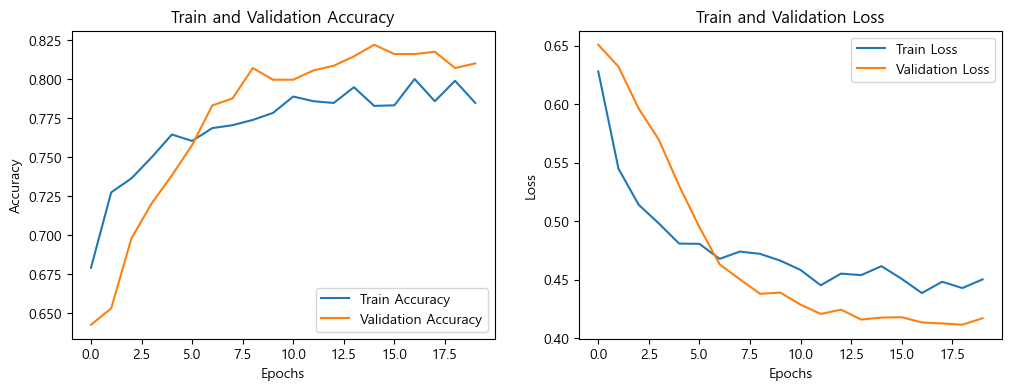

27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.73      0.78       424
           1       0.75      0.84      0.80       412

    accuracy                           0.79       836
   macro avg       0.79      0.79      0.79       836
weighted avg       0.79      0.79      0.79       836

Confusion Matrix:
 [[311 113]
 [ 64 348]]


In [1]:
# 필요한 라이브러리 임포트
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 한글 깨짐 방지
%matplotlib inline                                   
from matplotlib import font_manager, rc                            
plt.rcParams['axes.unicode_minus'] = False                          
f_path = "c:/Windows/Fonts/malgun.ttf"                              
font_name = font_manager.FontProperties(fname=f_path).get_name()    
rc('font', family=font_name)    

# 한글폰트 사용을 위해 설치
# 아래 모듈을 설치하고 불러오면 별도의 한글폰트 설정이 필요 없습니다.
# !pip install koreanize-matplotlib

# 데이터 로드 (GitHub에서 다운로드)
url = 'https://github.com/MyungKyuYi/AI-class/raw/main/abalone.csv'
data = pd.read_csv(url)

# 1. EDA (탐색적 데이터 분석)
print(data.info())
print(data.describe())

# 'Sex' 열을 One-hot 인코딩
data = pd.get_dummies(data, columns=['Sex'], drop_first=True)

# Rings를 기준으로 이진 분류 (10 이상 성숙, 10 미만 미성숙)
data['Rings'] = (data['Rings'] >= 10).astype(int)

# 2. 데이터 전처리
# X는 'Rings'를 제외한 나머지 특성, y는 예측할 레이블 'Rings'
X = data.drop('Rings', axis=1)
y = data['Rings']

# 데이터 분할 (훈련 데이터와 테스트 데이터)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2024)

# 표준화 (Standardization)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# LSTM 모델에서 3D 입력을 필요로 하므로 차원을 추가
X_train = np.expand_dims(X_train, axis=1)
X_test = np.expand_dims(X_test, axis=1)

# 3. LSTM 모델 구성
model = Sequential([
    LSTM(64, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=False),
    BatchNormalization(),
    Dropout(0.5),
    
    Dense(32, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # 이진 분류이므로 sigmoid 사용
])

# 모델 컴파일
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# 모델 학습
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2)

# 4. 성능 평가
loss, accuracy = model.evaluate(X_test, y_test)
print(f"LSTM 분류 모델 정확도: {accuracy:.4f}")

# 5. 학습 곡선 시각화
plt.figure(figsize=(12, 4))

# 정확도 그래프
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Train and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# 손실 그래프
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Train and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

# 6. 추가 성능 평가 지표
y_pred = (model.predict(X_test) > 0.5).astype("int32")
print(f"Classification Report:\n", classification_report(y_test, y_pred))
print(f"Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
